# CESM Control vs Forcing Runs

How appropriate is it to use the control run as a climatology?

In [1]:
#import my functions
import sys
sys.path.append('../')

import utils._modelDefinitions as _model
import utils.overlapBins as overlapBins

In [2]:
import xarray
import matplotlib.pyplot as plt
import numpy
import scipy.stats

%matplotlib inline

# First, compare the distribution of individual indices

In [3]:
# Here is the data
indecesXr = xarray.open_dataset('../results/cesmTradIndeces.nc').sel(year=slice(850,1849))

indecesXr.experiment.values

array(['LME.002', 'LME.003', 'LME.008', 'LME.009', '0850cntl.001', '001',
       '002', '003', '004', '005', '006', '007', '008', '009', '010',
       '011', '012', '013'], dtype=object)

In [4]:
indecesXr

<xarray.Dataset>
Dimensions:          (experiment: 18, year: 1000)
Coordinates:
  * year             (year) int64 850 851 852 853 854 ... 1846 1847 1848 1849
  * experiment       (experiment) object 'LME.002' 'LME.003' ... '012' '013'
Data variables:
    dmi              (experiment, year) float64 ...
    eastIO           (experiment, year) float64 ...
    nino34NoDetrend  (experiment, year) float64 ...
    nino34           (experiment, year) float64 ...
    sam              (experiment, year) float64 ...
    nino4NoDetrend   (experiment, year) float64 ...
    nino4            (experiment, year) float64 ...
    eastIONoDetrend  (experiment, year) float64 ...
Attributes:
    nino34NoDetrend:  [ 7 15]
    nino4NoDetrend:   [ 7 15]
    eastIONoDetrend:  [ 7 12]
    dmi:              [ 7 12]
    nino34:           [ 7 15]
    nino4:            [ 7 15]
    eastIO:           [ 7 12]
    sam:              [10 15]
    lat1:             [10 15]
    lat2:             [10 15]
    precAnom:         [ 9 15]
    tsAnom:           [ 9 15]

In [46]:
'string'.

'String'

In [124]:
def chi2Index(indexXr, bins):
    """
    
    This function plots a histogram with the control and the full forcing runs for the input data
    
    """

    #bins=numpy.arange(-2*std, 2.1*std, 0.25*std)

    #calculate histograms using numpy
    cntl=indexXr.sel(experiment=_model.cesmCntl)
    cntlHist, bins = numpy.histogram(cntl, bins=bins)
    mean=indexXr.sel(experiment=_model.cesmFullForcings)
    meanHist, bins = numpy.histogram(mean, bins=bins)

    #plot them on the same axes (as percentage)

    barWidth=0.4*(bins[1]-bins[0])



    plt.bar(bins[:-1],cntlHist/cntlHist.sum()*100, 
            label='cntl', width=-barWidth , align='edge')
    plt.bar(bins[:-1],meanHist/meanHist.sum()*100, 
           label='fullForcing', width=barWidth, align='edge' )

    plt.ylabel('Frequency (%)')


    plt.title(indexXr.name.capitalize()) #title with the index name
    #plt.legend()


    #Do the Chisquare
    print(
        scipy.stats.chisquare(cntlHist/cntlHist.sum(), meanHist/meanHist.sum() )
    )
        

Power_divergenceResult(statistic=0.011887912302128977, pvalue=0.9999999999482362)
Power_divergenceResult(statistic=0.009946721222624178, pvalue=0.9999999999746101)
Power_divergenceResult(statistic=0.008738506529914595, pvalue=0.9999999999848679)


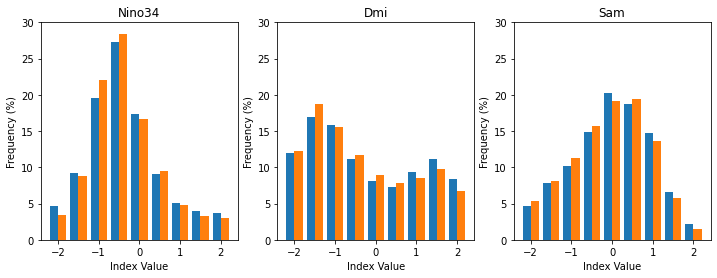

In [125]:

plt.figure(figsize=(12,4))
        
i=1


#For all indices
for iIndex in ['nino34', 'dmi', 'sam']:
    plt.subplot(1,3,i)

    chi2Index(indecesXr[iIndex], numpy.arange(-2,3,.5) )

    i=i+1
    
    #locs, labels = plt.yticks()
    
    #plt.yticks(numpy.arange(0,locs[-1],5))
    plt.xlabel('Index Value')
    plt.yticks(numpy.arange(0,35,5))
    
plt.savefig('../results/cesmControlVsPast1000/warmSeasonIndeces.svg')


In [103]:
numpy.arange(0,locs[-1],5)

array([ 0.,  5., 10., 15., 20., 25.])

# Same thing for the compounds

And for the compounds

In [61]:
#The data
firePos=xarray.open_dataset('../results/cesmFirePos.nc').sel(year=slice(850,1849))
fireNeg=xarray.open_dataset('../results/cesmFireNeg.nc').sel(year=slice(850,1849))

In [62]:
firePos.sum(dim='year')

<xarray.Dataset>
Dimensions:      (experiment: 18)
Coordinates:
  * experiment   (experiment) object 'LME.002' 'LME.003' ... '012' '013'
Data variables:
    dmi          (experiment) float64 82.0 91.0 69.0 69.0 ... 81.0 81.0 83.0
    nino34       (experiment) float64 14.0 15.0 10.0 15.0 ... 15.0 17.0 19.0
    sam          (experiment) float64 178.0 172.0 189.0 ... 173.0 161.0 179.0
    nEvents      (experiment) float64 629.0 624.0 644.0 ... 643.0 619.0 601.0
    all3         (experiment) float64 53.0 56.0 58.0 57.0 ... 66.0 50.0 42.0
    nino34+dmi   (experiment) float64 47.0 49.0 48.0 51.0 ... 39.0 56.0 47.0
    nino34+sam   (experiment) float64 24.0 20.0 30.0 19.0 ... 31.0 24.0 18.0
    dmi+sam      (experiment) float64 27.0 20.0 23.0 24.0 ... 18.0 25.0 32.0
    anyCompound  (experiment) float64 151.0 145.0 159.0 ... 154.0 155.0 139.0

In [63]:
def chi2Event(xr, x):

    """This function plots the number of events in each compound """
    firePosSum = xr.to_array().sum(dim=['year'])
    
    cntl=firePosSum.sel(variable=x).sel(
        experiment=_model.cesmCntl).values
    fullForcing=firePosSum.sel(variable=x).sel(
        experiment=_model.cesmFullForcings).sum(dim='experiment')/13

    plt.bar(x, cntl/10,  # /1000 years *100 to turn to %
            align='edge', width=-.3, label='cntl'
           )
    plt.bar(x, fullForcing/10, 
            align='edge', width=0.3, label='fullForcing'
           )

    plt.ylabel('Number of events(%)')
    plt.xlabel('Event')
    
    plt.legend()

    print( scipy.stats.chisquare(cntl, f_exp=fullForcing ) )

    
    

Power_divergenceResult(statistic=16.51857564473342, pvalue=0.011225309191918196)


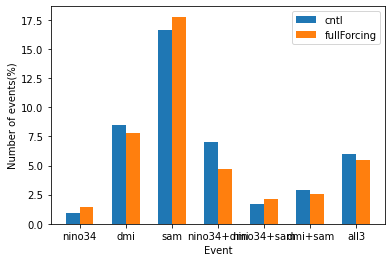

In [77]:
chi2Event(firePos, [*firePos.indeces, *firePos.pairs, 'all3'])


Power_divergenceResult(statistic=7.7370343467676195, pvalue=0.2580088114639665)


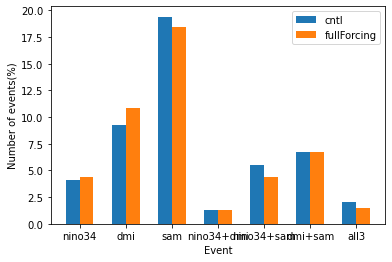

In [65]:
chi2Event(fireNeg, [*fireNeg.indeces, *fireNeg.pairs, 'all3'])

# In overlapping 30 year bins

In [66]:
overBinFirePos = overlapBins.binSum(firePos)
overBinFireNeg = overlapBins.binSum(fireNeg)

In [67]:
overBinFireNeg

<xarray.Dataset>
Dimensions:      (experiment: 18, year: 98)
Coordinates:
  * experiment   (experiment) object 'LME.002' 'LME.003' ... '012' '013'
  * year         (year) int32 865 875 885 895 905 ... 1795 1805 1815 1825 1835
Data variables:
    dmi          (year, experiment) float64 3.0 3.0 1.0 3.0 ... 3.0 3.0 4.0 4.0
    nino34       (year, experiment) float64 0.0 0.0 1.0 2.0 ... 0.0 2.0 3.0 0.0
    sam          (year, experiment) float64 1.0 6.0 7.0 9.0 ... 9.0 5.0 5.0 2.0
    nEvents      (year, experiment) float64 16.0 20.0 18.0 ... 14.0 18.0 14.0
    all3         (year, experiment) float64 0.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    nino34+dmi   (year, experiment) float64 1.0 0.0 0.0 0.0 ... 1.0 0.0 0.0 1.0
    nino34+sam   (year, experiment) float64 4.0 2.0 1.0 0.0 ... 0.0 1.0 1.0 1.0
    dmi+sam      (year, experiment) float64 1.0 2.0 2.0 0.0 ... 0.0 1.0 2.0 2.0
    anyCompound  (year, experiment) float64 6.0 5.0 4.0 1.0 ... 1.0 2.0 3.0 4.0
Attributes:
    all3:     ['nino34', 'dmi', 'sam']
    indeces:  ['nino34', 'dmi', 'sam']
    pairs:    ['nino34+dmi', 'nino34+sam', 'dmi+sam']
    Bins:     Overlapping 30 year bins, seperating by 10 year intervals
    Year:     Midpoint of bin

In [68]:
overBinFirePos.pairs

['nino34+dmi', 'nino34+sam', 'dmi+sam']

Power_divergenceResult(statistic=0.5258432495461663, pvalue=0.9709368603981113)
Power_divergenceResult(statistic=0.05689046135070461, pvalue=0.9719555260361346)
Power_divergenceResult(statistic=0.04331789191341232, pvalue=0.978573924738561)
Power_divergenceResult(statistic=0.09764210149707421, pvalue=0.9921188717068288)


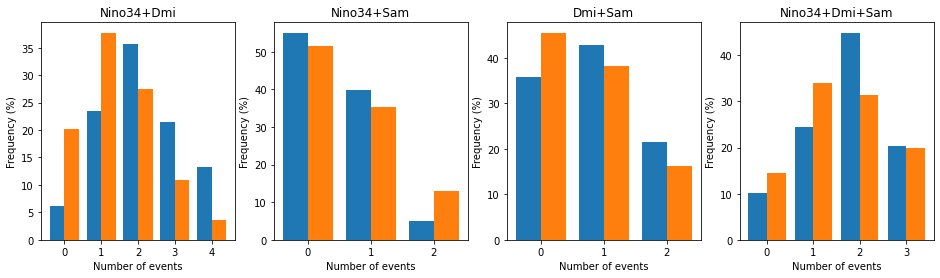

In [145]:
plt.figure(figsize=(16,4))
        
plt.subplot(1,4,1)
chi2Index(overBinFirePos['nino34+dmi'], 5 )
plt.title('Nino34+Dmi')
plt.xlabel('Number of events')

plt.subplot(1,4,2)
chi2Index(overBinFirePos['nino34+sam'], 3 )
plt.title('Nino34+Sam')
plt.xlabel('Number of events')

plt.subplot(1,4,3)
chi2Index(overBinFirePos['dmi+sam'], 3 )
plt.title('Dmi+Sam')
plt.xlabel('Number of events')

plt.subplot(1,4,4)
chi2Index(overBinFirePos['all3'], 4 )
plt.title('Nino34+Dmi+Sam')
plt.xlabel('Number of events')

plt.savefig('../results/cesmControlVsPast1000/firePos.svg')

Power_divergenceResult(statistic=0.010743714296600879, pvalue=0.9946425454751578)
Power_divergenceResult(statistic=0.14945799435452203, pvalue=0.985303692472562)
Power_divergenceResult(statistic=0.012049546994510234, pvalue=0.9999819237832588)
Power_divergenceResult(statistic=0.07739054277960473, pvalue=0.9620438267617151)


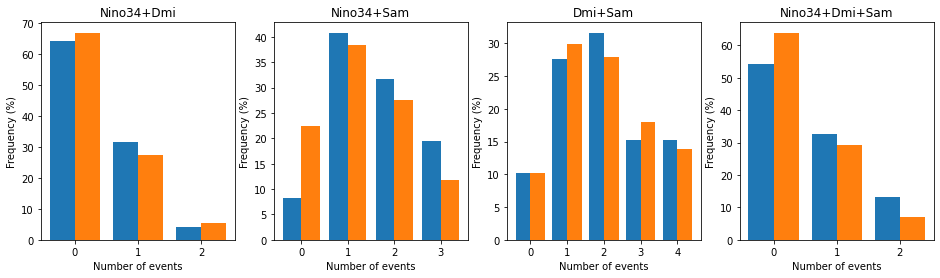

In [144]:
plt.figure(figsize=(16,4))
        
plt.subplot(1,4,1)

chi2Index(overBinFireNeg['nino34+dmi'], [0,1,2,3] )
plt.title('Nino34+Dmi')
plt.xticks([0,1,2])
plt.xlabel('Number of events')

plt.subplot(1,4,2)

chi2Index(overBinFireNeg['nino34+sam'], 4 )
plt.title('Nino34+Sam')
plt.xlabel('Number of events')

plt.subplot(1,4,3)

chi2Index(overBinFireNeg['dmi+sam'], 5 )
plt.title('Dmi+Sam')
plt.xlabel('Number of events')

plt.subplot(1,4,4)

chi2Index(overBinFireNeg['all3'],  [0,1,2,3] )
plt.title('Nino34+Dmi+Sam')
plt.xlabel('Number of events')

plt.savefig('../results/cesmControlVsPast1000/fireNeg.svg')